# Prediciting if an NFT is going to be Sold or Not Sold.

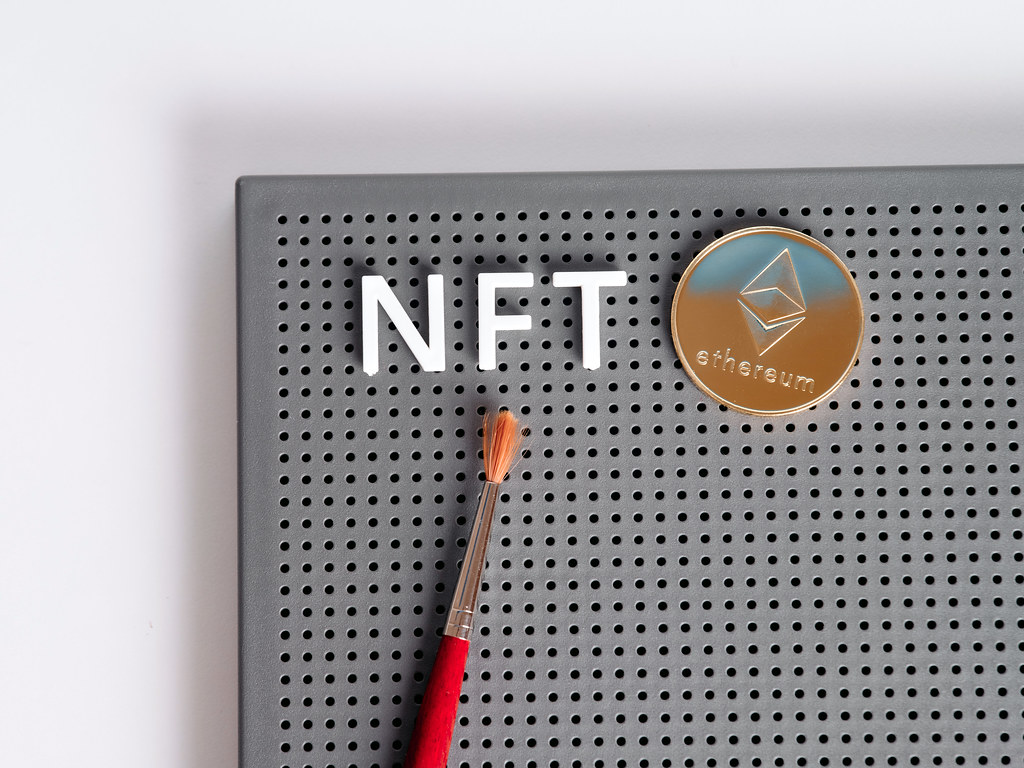

## Overview 

What’s an NFT? An NFT is a unit of data stored on a blockchain that certifies a digital
asset to be unique and therefore not interchangeable. The first popular example of NFTs is CryptoKitties, a collection of artistic images representing virtual cats that are used in a game on Ethereum that allows players to purchase, collect, breed, and sell them on Ethereum. Twitter's former ceo Jack Dorsey sold his first tweet as NFTs for [$2.9 million](https://www.theverge.com/2021/3/22/22344937/jack-dorsey-nft-sold-first-tweet-ethereum-cryptocurrency-twitter)

OpenSea is the largest marketplace for NFTs and, actually, acts as a 'marketplace for marketplaces'. Using their API, was able to gather about 44,000 data from 2018 to 2021. Then engineer the columns for the target class using the combination of the number of sales; sell orders and the lastsale.eventtype (all these are columns within the data). 

We recommend that if an NFT is created for sale or resell, opensea is an important place.

### Business Problem

30 million dollars, that was the market capitalization of NFts by the end of 2017 and as at this writing December 2021 according to JP Morgan is valued at $7 billion. So for this increase in valuation signifies increase in value. For anything of value there will be creators and consumers. However, there are even fewer NFTs that is valuable. 
So how can creators be able to predict if the NFTs will be sold or not. 

To be able to answer we have to understand what error the model can make:
 - Type I Error (FP) = predicting an NFT will sell when it will not
-  Type II Error (FN) = predicting an NFT will not sell when it will

We need to try to reduce type I error for the seller to reduce time and effort however if type II error occurs. It wil be a plus to the seller.

#### Sources
https://markets.businessinsider.com/news/currencies/nft-market-worth-7-billion-legal-issues-could-hinder-growth-2021-11
https://www.theverge.com/2021/3/22/22344937/jack-dorsey-nft-sold-first-tweet-ethereum-cryptocurrency-twitter

### Data

OpenSea is a primary marketplace for other marketplaces, we gathered the data using its API and gathered about 30k rows and picking the most suitable. The columns of data contain many null values based on which columns are used by which marketplace. From the data was grouped into attributes of the token;the asset class and collections of other token like itself. The target was from three different columns because using one each creates imbalance and moreover keeping in mind that there were few NFTs that was sold more than once.

We decided to create binary columns for each feature. Alot of engineering went into the creation of binary columns with different approaches for boolean, integer, object using different techniques.

### Methodology

- The first step was the [data gathering stage](notebooks/Nft_data_gathering.ipynb) and what we did was gather the data through the OpenSea API. The OpeanSea only allows a certain number of data from their server. So this notebook was all about looping all certain amout of data I needed and converting them into csv files.


- The next step was [analysing the data](notebooks/NFT_analysis.ipynb), we checked the data gathered for hidden information. Checking for missing values in its percentages and deciding what to do with it. Discovered that the whole data can be classified into 4 classes (sales information; information about the NFT asset; information about collection the Nft is in and information about the creator of the NFT. Since the business problem was to decide if an NFT will sell or not; we engineeered the sales columns for our target label (combining the nuber of sales, the sell order, and last sale of event type). We further explored the data based on the asset class and collection class.



- With this step [processing of the data](notebooks/Preprocessing.ipynb). At first drew a baseline from the target created and tried to fill out the missing values based on different dtypes. However, ran into errors during the splitting data stage. So we decided to split the data into a training data and test data. Use the simple imputer library to Impute the median value in numerical data because it has less outliers. Also for the object variable, was using the Ordinal Encoding library. And using the pandas library concatenate both together. Did the same process for the test data. 


### Imports And Functions

important functions for plotting important features from the model and also a function on evaluating the data

In [34]:
# import important features 
def plot_feature_imp(estimator, X):
    '''
    Plot feature importance of model
    
    Parameters
    ----------
    estimator : estimator object
        This is assumed to implement the scikit-learn estimator interface.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples
        
        
    Output
    ------
    - Prints plot of features in order of importance
    
    '''
    
    feats = estimator.feature_importances_
    feature_imps = dict(zip(X.columns, feats))

    # creating list of column names
    feat_names=list(X.columns)

    # Sort feature importances in descending order
    indices = np.argsort(feats)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feat_names[i] for i in indices]

    # Create plot
    plt.figure(figsize = [16,6])

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), feats[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=50, ha = 'right')

    # Show plot
    plt.show()

In [35]:
def evaluate(estimator, X_tr, y_tr):
    '''
    This is to evalute the best models and outputs are the metrics and matrix
    estimator: model,
    X_tr: X_train,
    y_tr: y_training set
    '''
#    predicts the models
    tr_preds = estimator.predict(X_tr)

    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train recall: {recall_score(y_tr, tr_preds)}")
    print("*" * 10)


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [3]:
pd.pandas.set_option('display.max_columns', None)
parse_dates = ['listing_date','asset_contract.created_date', 'collection.created_date']
nft_sale_df = pd.read_csv('csv-files/nftsale.csv', low_memory=False, parse_dates=parse_dates)

In [4]:
nft_sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Columns: 130 entries, Unnamed: 0 to transfer_fee_payment_token.usd_price
dtypes: bool(9), datetime64[ns](3), float64(25), int64(13), object(80)
memory usage: 13.5+ MB


In [5]:
nft_sale_df.describe()

,Unnamed: 0,id,num_sales,decimals,top_bid,transfer_fee_payment_token,asset_contract.owner,asset_contract.total_supply,asset_contract.dev_buyer_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_buyer_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,asset_contract.buyer_fee_basis_points,asset_contract.seller_fee_basis_points,collection.dev_buyer_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_buyer_fee_basis_points,collection.opensea_seller_fee_basis_points,last_sale.asset.decimals,last_sale.asset_bundle,last_sale.payment_token.id,last_sale.payment_token.decimals,last_sale.payment_token.eth_price,last_sale.payment_token.usd_price,last_sale.transaction.block_number,last_sale.transaction.id,last_sale.transaction.transaction_index,last_sale.quantity,creator,last_sale.transaction.from_account.user,last_sale.transaction.to_account.user,owner.user,creator.user,last_sale,transfer_fee_payment_token.id,transfer_fee_payment_token.decimals,transfer_fee_payment_token.eth_price,transfer_fee_payment_token.usd_price
count,14461.000000,1.446100e+04,14461.000000,4000.0,0.0,0.0,1.165900e+04,1328.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,14461.0,14461.000000,29.0,0.0,4184.000000,4184.000000,4178.000000,4178.000000,4.184000e+03,4.184000e+03,4184.000000,4152.000000,0.0,0.0,0.0,0.0,0.0,0.0,19.0,19.0,1.900000e+01,1.900000e+01
mean,9999.765438,6.189012e+07,28.478667,0.0,NaN,NaN,1.352265e+07,137.871235,0.0,136.289676,0.0,249.861697,0.0,386.151373,0.0,455.793790,0.0,249.861697,0.0,NaN,4.646750,17.919694,0.983943,3977.147082,1.314609e+07,1.677067e+08,167.816922,4.567678,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00
std,5719.285690,4.724710e+07,194.379913,0.0,NaN,NaN,2.972555e+07,1146.537191,0.0,247.061572,0.0,5.878692,0.0,247.060855,0.0,384.439182,0.0,5.878692,0.0,NaN,33.551677,0.970645,0.126018,513.055590,8.006248e+05,4.290864e+07,102.312160,90.310958,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.227824e-19,4.562583e-16
min,0.000000,1.787230e+05,0.000000,0.0,NaN,NaN,1.000000e+02,0.000000,0.0,0.000000,0.0,0.000000,0.0,250.000000,0.0,0.000000,0.0,0.000000,0.0,NaN,1.000000,0.000000,0.000031,0.142340,5.520906e+06,2.357329e+06,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00
25%,5107.000000,1.706683e+07,0.000000,0.0,NaN,NaN,1.023840e+05,0.000000,0.0,0.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.302388e+07,1.482156e+08,89.750000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00
50%,10034.000000,5.714872e+07,15.000000,0.0,NaN,NaN,1.023840e+05,0.000000,0.0,0.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.340466e+07,1.804090e+08,150.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00
75%,14767.000000,1.118344e+08,18.000000,0.0,NaN,NaN,1.139878e+06,0.000000,0.0,250.000000,0.0,250.000000,0.0,500.000000,0.0,1000.000000,0.0,250.000000,0.0,NaN,1.000000,18.000000,1.000000,4043.600000,1.363502e+07,2.030365e+08,231.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00
max,20099.000000,1.190305e+08,14377.000000,0.0,NaN,NaN,1.452623e+08,10333.000000,0.0,1250.000000,0.0,250.000000,0.0,1500.000000,0.0,1500.000000,0.0,250.000000,0.0,NaN,690.000000,18.000000,1.493008,4043.600000,1.369297e+07,2.098272e+08,793.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,1.453979e-03,3.830000e+00


### Baseline 

In [8]:
df['target'].value_counts(normalize=True)

1    0.668004
0    0.331996
Name: target, dtype: float64

### Train Test Split

In [19]:
X = nft_df.drop('target', axis=1)
y = nft_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [71]:
X_train.head(12)

,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address,id,is_presale,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.featured,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points
1791,2020-05-27 16:53:32.834583,Rarible 1155,ERC1155,semi-fungible,2020-01-01 13:22:57.777065,rarible,approved,0x0000000000000000000000000000000000000000,21459482,False,NaN,250,0,250,False,0,250
8067,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-20 22:00:44.082162,untitled-collection-15155546,not_requested,0x0000000000000000000000000000000000000000,111823746,True,NaN,250,0,250,False,0,250
9839,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 07:31:31.489277,donald-trump-andy-warhol-style,not_requested,0x0000000000000000000000000000000000000000,111833724,True,NaN,250,0,250,False,1000,250
6886,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xcb32569a5ede5bcacaca7038ea9fbbad7c348895,1702118,False,NaN,500,250,250,False,250,250
3891,2018-09-25 09:54:55.173827,Hero,ERC721,non-fungible,2019-04-26 22:13:15.518921,hero,not_requested,0xd5768cb94634dea639f32078c4e82b5161a081fc,1715526,False,NaN,250,0,250,False,0,250
944,2020-10-12 16:25:20.228951,dontrug.me,ERC1155,semi-fungible,2020-10-12 16:32:31.348076,dontrug-me,verified,0x0000000000000000000000000000000000000000,60449553,False,NaN,1250,1000,250,False,1000,250
8868,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 23:02:20.969452,secretcastle,not_requested,0x0000000000000000000000000000000000000000,111827961,True,NaN,250,0,250,False,800,250
4829,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0x0172b9d9328da423cc9057fb264e7b309fcba797,1704567,False,NaN,500,250,250,False,250,250
5358,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xf302a0d506087cb6393ec1a97b0e69f47c3bcee5,1703958,False,NaN,500,250,250,False,250,250
875,2021-09-17 15:06:09.145889,AnimightiesJigScene,ERC1155,semi-fungible,2021-09-17 15:45:24.579657,animightiesjigscene,not_requested,0x0000000000000000000000000000000000000000,53941850,False,NaN,750,500,250,False,500,250


## Models

### Decision Tree

In [36]:
nft_tree = DecisionTreeClassifier(random_state=42)

In [38]:
nft_tree.fit(train_conv_nft_df, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
cross_val_score(nft_tree, train_conv_nft_df, y_train, cv=5)

array([0.93981293, 0.94182262, 0.93531326, 0.9357201 , 0.93816111])

In [1]:
# getting the accuracy score for test data

In [40]:
nft_tree.score(test_nft_df, y_test)

0.9447004608294931

/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


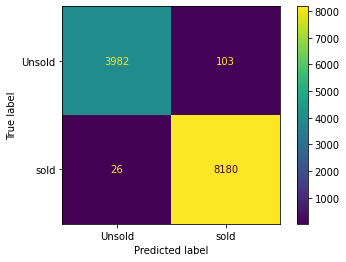

In [41]:
plot_confusion_matrix(nft_tree, train_conv_nft_df, y_train, include_values=True, display_labels=['Unsold', 'sold'])

### Hypertuned the decision tree 

In [42]:
param_dict = {
    'criterion':['entropy', 'gini'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf':range(1,5)
}

In [44]:
grid = GridSearchCV(nft_tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(train_conv_nft_df, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 250

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [45]:
grid.best_score_

0.9361324230817573

In [46]:
tuned_nft_tree = grid.best_estimator_

In [47]:
evaluate(tuned_nft_tree, train_conv_nft_df, y_train)

Training Scores:
Train Accuracy: 0.9561467740623221
Train precision: 0.9741496598639455
Train recall: 0.9597855227882037
**********


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


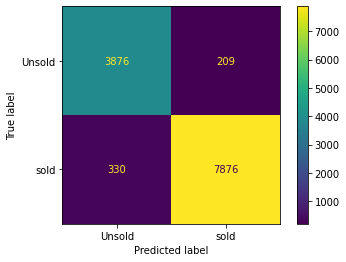

In [48]:
plot_confusion_matrix(tuned_nft_tree, train_conv_nft_df, y_train, include_values=True, display_labels=['Unsold', 'sold'])

### Random Forest Classifier

In [54]:
nft_rand = RandomForestClassifier(random_state=42)
nft_rand.fit(conv_nft_df, y_train)

RandomForestClassifier(random_state=42)

In [55]:
cross_val_score(nft_rand, conv_nft_df, y_train, cv=5)

array([0.95038634, 0.95524817, 0.9544345 , 0.94426363, 0.94833198])

In [58]:
params_nft ={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rand_forest=RandomizedSearchCV(estimator= nft_rand,
               param_distributions= params_nft,
               cv=5)

gs_rand_forest.fit(conv_nft_df, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [20, 40, 50, 60],
                                        'n_estimators': [100, 200, 400]})

In [55]:
rand_nft = gs_rand_forest.best_estimator_

In [56]:
cross_val_score(rand_nft, train_conv_nft_df, y_train, cv=5)

array([0.94916633, 0.94955248, 0.94792514, 0.93938161, 0.94751831])

In [57]:
rand_nft.score(test_nft_df, y_test)

0.9216589861751152

In [58]:
evaluate(rand_nft, train_conv_nft_df, y_train)

Training Scores:
Train Accuracy: 0.9890163534293386
Train precision: 0.9862634052295457
Train recall: 0.9974408969047038
**********


/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


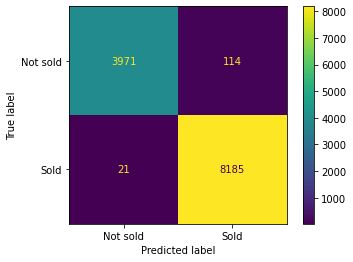

In [59]:
plot_confusion_matrix(rand_nft, train_conv_nft_df, y_train, include_values=True, display_labels=['Not sold', 'Sold'])

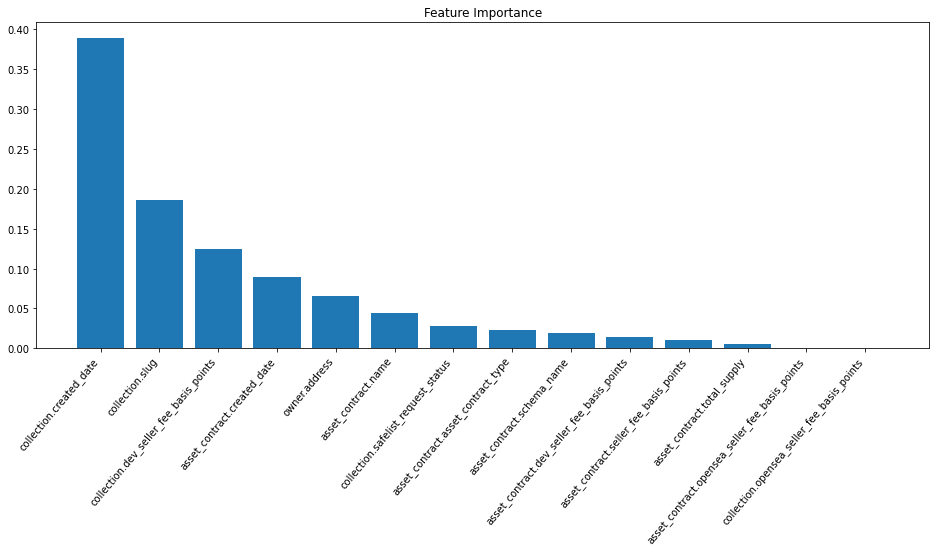

In [60]:
plot_feature_imp(rand_nft, train_conv_nft_df)

### Results 

- The decision tree model produced the best fit model with 95% accuracy on the test data. Precision score of 96% and total recall of 95.5%. 

### Understanding 

After evaluating the data, the model predicts 'collection.created_date'; 'collection.slug' as one of the most important features. And this signifies that older NFTs have more value and are more likely to be sold than the newer NFTs. Also, due to the prediciting that some particular nfts collection will likely be sold. Examples like the dodgers-mlb-crypto and the lucky-binary-nft-number. 

## Next step

- Deploy the model for use 

- We need to gather more data from other secondary markets as well and do an extensive analysis of indicators of this token with open sea. And cross reference some attributes not only in OpenSea. 

- Also, we need to increase the number of attributes, and keep some attributes that were dropped. 

- Change the way the data are processed and maybe will produce a different sets of best fit models.